In [ ]:
import pandas as pd
import re

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d thedevastator/spotify-tracks-genre-dataset

 34% 9.00M/26.5M [00:00<00:00, 40.1MB/s]
100% 26.5M/26.5M [00:00<00:00, 93.4MB/s]


In [ ]:
!unzip /content/spotify-tracks-genre-dataset.zip

Archive:  /content/news-category-dataset.zip
  inflating: News_Category_Dataset_v3.json  


In [ ]:
df = pd.read_csv('/content/train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df = df.loc[:, ['track_name', 'track_genre']]
df = df.sample(frac=1, random_state=42)
df.info()
df.head(11399)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 113186 to 15795
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_name   113999 non-null  object
 1   track_genre  114000 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


,track_name,track_genre
113186,No Other Name,world-music
42819,Failed Organum,grindcore
59311,"Save the Trees, Pt. 1",iranian
91368,Merry Christmas,rock
61000,月の大きさ,j-idol
...,...,...
8293,When You're Smiling/The Sheik Of Araby,blues
62250,veil,j-pop
70582,一個人想著一個人,mandopop
67127,Tu Veneno,latin


In [ ]:
df['track_genre'].value_counts()

world-music    1000
ska            1000
songwriter     1000
trance         1000
spanish        1000
               ... 
electronic     1000
reggaeton      1000
funk           1000
techno         1000
goth           1000
Name: track_genre, Length: 114, dtype: int64

In [ ]:
df = df[df['track_genre'].isin(['acoustic','pop','rock'])]
df['track_genre'].value_counts()

rock        1000
acoustic    1000
pop         1000
Name: track_genre, dtype: int64

In [ ]:
# Menghapus special character di kolom text
df['track_name'] = df['track_name'].map(lambda x: re.sub(r'\W+', ' ', x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 91368 to 860
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   track_name   3000 non-null   object
 1   track_genre  3000 non-null   object
dtypes: object(2)
memory usage: 70.3+ KB


<ipython-input-54-b49ebf7bc633>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['track_name'] = df['track_name'].map(lambda x: re.sub(r'\W+', ' ', x))


In [ ]:
# Mengecek nilai kosong / nan
# Jika true maka ada dan jika false maka tidak ada nilai kosong / nan
df.isnull().values.any()

False

In [ ]:
category = pd.get_dummies(df.track_genre)
df_genre = pd.concat([df, category], axis=1)
df_genre = df_genre.drop(columns='track_genre')
df_genre.head()

,track_name,acoustic,pop,rock
91368,Merry Christmas,0,0,1
115,In Case You Didn t Know,1,0,0
81212,Into Your Arms feat Ava Max,0,1,0
81567,Ferxxo 100,0,1,0
128,Come On Get Higher,1,0,0


In [ ]:
# Mengubah tipe data menjadi str dan numpy array
title = df_genre['track_name'].astype(str)
label = df_genre[['acoustic','pop','rock']].values

In [ ]:
title_train, title_test, label_train, label_test = train_test_split(title, label, test_size = 0.2)

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(title_train)
tokenizer.fit_on_texts(title_test)

train_sequences = tokenizer.texts_to_sequences(title_train)
test_sequences = tokenizer.texts_to_sequences(title_test)

padded_train = pad_sequences(train_sequences, maxlen=32, padding='post', truncating='post')
padded_test = pad_sequences(test_sequences, maxlen=32, padding='post', truncating='post')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi train dan validasi didapat telah mencapai nilai > 90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

num_epochs = 30
history = model.fit(padded_train, label_train,
                    epochs=num_epochs,
                    validation_data=(padded_test, label_test),
                    verbose=2,
                    callbacks=[early_stopping])

Epoch 1/30
75/75 - 8s - loss: 1.1201 - accuracy: 0.3308 - val_loss: 1.0991 - val_accuracy: 0.3333 - 8s/epoch - 111ms/step
Epoch 2/30
75/75 - 2s - loss: 1.0639 - accuracy: 0.4179 - val_loss: 1.0910 - val_accuracy: 0.3983 - 2s/epoch - 22ms/step
Epoch 3/30
75/75 - 2s - loss: 0.8737 - accuracy: 0.6046 - val_loss: 1.0145 - val_accuracy: 0.5750 - 2s/epoch - 26ms/step
Epoch 4/30
75/75 - 4s - loss: 0.5907 - accuracy: 0.7729 - val_loss: 0.9157 - val_accuracy: 0.6117 - 4s/epoch - 47ms/step
Epoch 5/30
75/75 - 2s - loss: 0.4292 - accuracy: 0.8487 - val_loss: 0.8483 - val_accuracy: 0.6533 - 2s/epoch - 21ms/step
Epoch 6/30
75/75 - 2s - loss: 0.3309 - accuracy: 0.8858 - val_loss: 0.8063 - val_accuracy: 0.6300 - 2s/epoch - 22ms/step
Epoch 7/30
75/75 - 2s - loss: 0.2790 - accuracy: 0.9062 - val_loss: 0.9090 - val_accuracy: 0.6250 - 2s/epoch - 23ms/step
Epoch 8/30
75/75 - 2s - loss: 0.2954 - accuracy: 0.9067 - val_loss: 0.8595 - val_accuracy: 0.6517 - 2s/epoch - 21ms/step
Epoch 9/30
75/75 - 2s - loss: 0

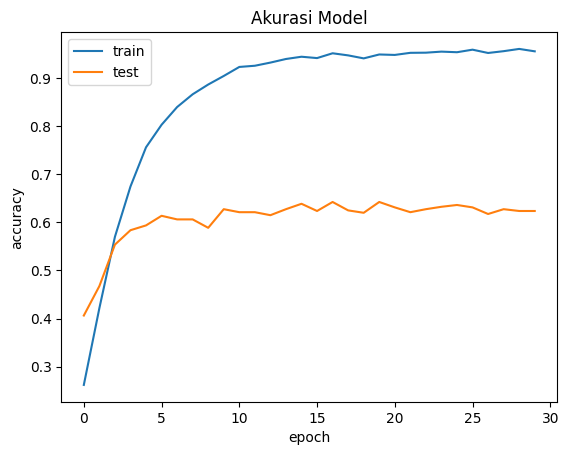

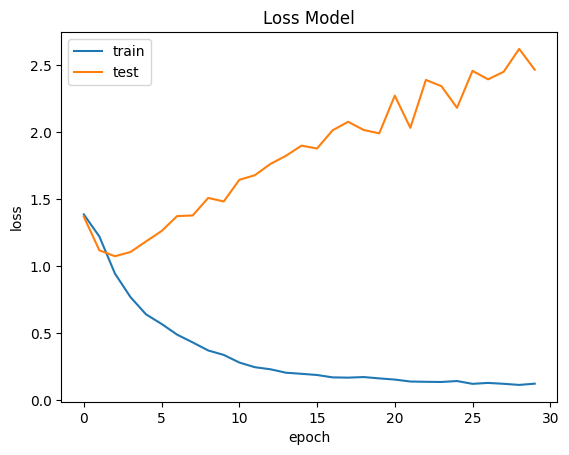

In [ ]:
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()